In [1]:
from cpflow.core_flow import CPFlow
from old_source_code.data import create_joint_x_y
import torch
from utils import TrainParams

X, Y = create_joint_x_y(1000)
X_dataset = torch.from_numpy(X)
Y_dataset = torch.from_numpy(Y)
device_and_dtype_specifications = dict(dtype=torch.float64, device=torch.device("cpu"))

X_dataset = X_dataset.to(**device_and_dtype_specifications)
Y_dataset = Y_dataset.to(**device_and_dtype_specifications)

dataloader = torch.utils.data.DataLoader(
    torch.utils.data.TensorDataset(X_dataset, Y_dataset), batch_size=64, shuffle=True
)
train_params = TrainParams(num_epochs=20, learning_rate=0.001, verbose=True)

cpflow = CPFlow(
    feature_dimension=X_dataset.shape[1],
    response_dimension=Y_dataset.shape[1],
    hidden_dimension=64,
    number_of_hidden_layers=10,
)
cpflow.to(**device_and_dtype_specifications)
_ = cpflow.fit(train_loader=dataloader, train_params=train_params)

# to save the model:
cpflow.save("cpflow.pth")

# to load the model:
_ = cpflow.load("cpflow.pth")

  0%|          | 0/20 [00:00<?, ?it/s]

init loss: -1.4167939833111212
10 -1.3504048344370085


20 -2.860490222036378
30 -4.353909121453412
40 -5.753571202481621
50 -7.237548924419204
60 -8.643526287317453
70 -9.990757832284604
80 -11.393365692461805
90 -12.769541915652262
100 -14.236303196326096
110 -15.557679424019828
120 -16.94611002340017
130 -18.312587116008636
140 -19.74634867072352
150 -21.122894875596096
160 -22.42787856246327
170 -23.835825280175523
180 -25.22385555782044
190 -26.537785532501793
200 -27.99299713526666
210 -29.277996969720913
220 -30.648712530784717
230 -32.133669177557366
240 -33.48529105804838
250 -34.85494122086984
260 -36.22876669255922
270 -37.54742032340297
280 -38.92003610884591
290 -40.33356726794577
300 -41.71493274499896
310 -43.107369958416726
320 -44.497716573869866


/home/nkotelevskii/github/conditional_quantile_function/src/cpflow/cpflows.py:219: UserWarning: brute force
  warnings.warn("brute force")


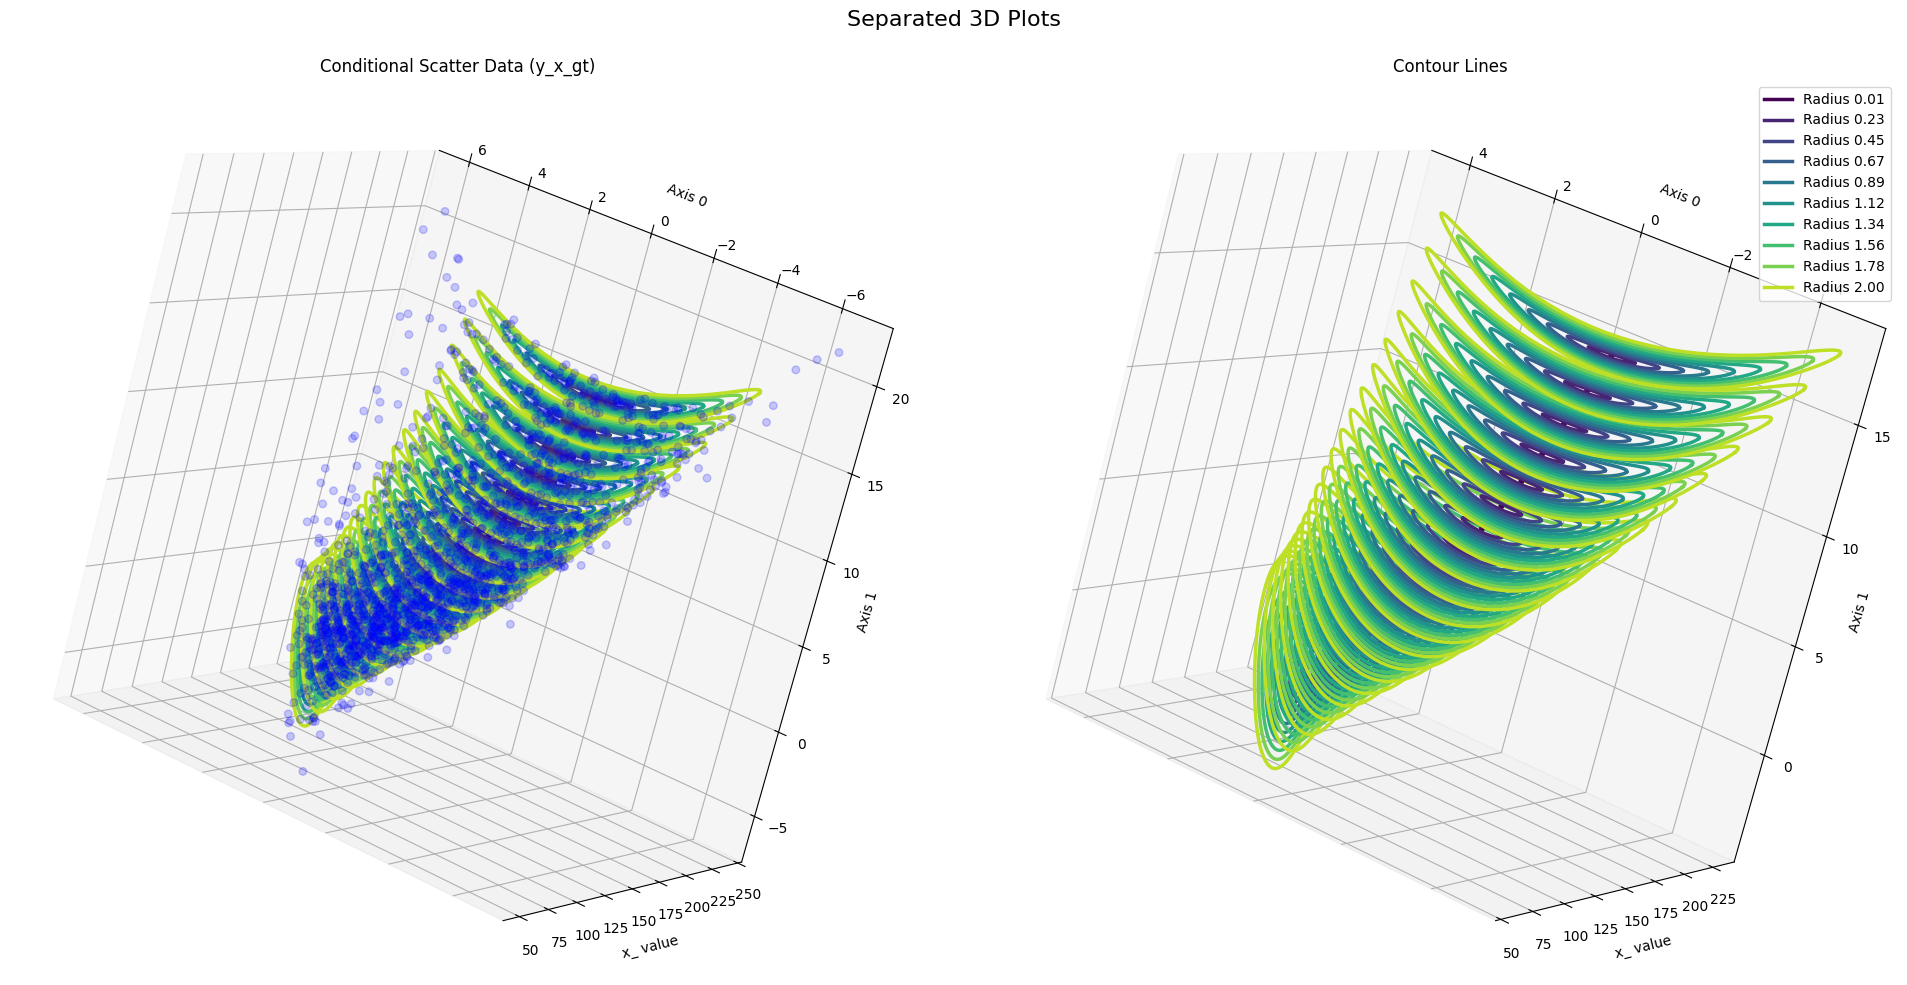

In [2]:
%matplotlib inline
from utils import plot_potentials_from_banana_dataset

cpflow.eval()
plot_potentials_from_banana_dataset(
    model=cpflow, device_and_dtype_specifications=device_and_dtype_specifications
)